In [305]:
import numpy as np
import pandas as pd

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

__Решение__

$\overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$ - среднее арифметическое


In [306]:
salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90]

In [307]:
average = sum(salaries) // len(salaries)
average

69

$\sigma_X^2 = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$ - смещеная оценка дисперсия

In [308]:
sal = [(salary - average) ** 2 for salary in salaries]
dispersion = sum(sal) // len(salaries)
dispersion

1931

$\sigma_{X, \: unbiased}^2 = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$ - несмещенная оценка дисперсии

In [309]:
unbiased_dispersion = sum(sal) // (len(salaries) - 1)
unbiased_dispersion

2033

$\sigma_{X, \: unbiased} = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$ - среднее квадратическое отклонение

In [310]:
unbiased_dispersion ** 0.5

45.088801270381985

Проверка: 

In [311]:
salaries_pd = pd.DataFrame(salaries)

In [312]:
salaries_pd.var()

0    2033.378947
dtype: float64

In [313]:
salaries_pd.var(ddof=0)

0    1931.71
dtype: float64

In [314]:
salaries_pd.std(ddof=1)

0    45.093003
dtype: float64

----------

__Задача 2__

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из `boxplot`). 

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

__Решение__

In [315]:
salaries.sort()

In [316]:
print (salaries)

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 230]


In [317]:
if len (salaries) % 2 != 0:
    print ('Median =', salaries[len (salaries) // 2])
else:
    print ('Median =', (salaries[len (salaries) // 2 - 1] + salaries[len (salaries) // 2 ]) / 2)

Median = 67.5


In [318]:
Quantile_1 = (salaries[len (salaries) // 4 - 1] + salaries[len (salaries) // 4]) / 2
print ('Quantile_1 =', Quantile_1)


Quantile_1 = 39.0


In [319]:
Quantile_3 = salaries[len(salaries) - 1 - len (salaries) // 4 ]
print ('Quantile_3 =', Quantile_3)

Quantile_3 = 80


In [320]:
salaries_pd.quantile([0.25, 0.5, 0.75])

,0
0.25,42.0
0.50,67.5
0.75,81.0


In [321]:
iqr = Quantile_3 - Quantile_1
iqr

41.0

In [322]:
for i in salaries:
    if i <= Quantile_1 - iqr * 1.5:
        print ('below:', i)
    elif i >= Quantile_3 + iqr *1.5:
        print ('above:', i)

above: 230


In [323]:
import seaborn as sns

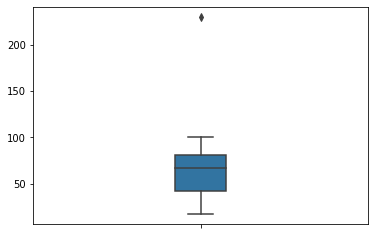

In [324]:
sns.boxplot(salaries_pd, orient='v', width=0.15)

------------------


__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

__Решение__

B - студент сдал экзамен

A1 - студент факультета A, P(A1) = 0.25

A2 - студент факультета B, P(A2) = 0.25

A3 - студент факультета C, P(A3) = 0.5

тогда условные вероятности P(B|A1)=0.8, P(B|A2)=0.7, P(B|A3)=0.9
т.к. студент может сдать экзамен только если он либо с факультета A, B, C и на двух факультетах он учиться не может (видимо по условию так), то события независимые и вероятность того, что студент в принципе сдаст экзамен, независимо, с какого он факультета:

P(B)=P(A1) * P(B|A1) + P(A2) * P(B|A2) + P(A3) * P(B|A3)


In [326]:
p_b = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
p_b

0.825

по формуле Байеса можно вычислить вероятности "если студент с факультета А, то он сдаст экзамен с такой-то вероятностью и подобно для факультетов B и C"

P(A|B)=P(A) * P(B|A) / P(B)

In [327]:
p_a1_b = 0.25 * 0.8 / 0.825
p_a1_b

0.24242424242424246

In [328]:
p_a2_b = 0.25 * 0.7 / 0.825
p_a2_b

0.21212121212121213

In [329]:
p_a3_b = 0.5 * 0.9 / 0.825
p_a3_b

0.5454545454545455

In [330]:
one = p_a1_b + p_a2_b + p_a3_b
one

1.0